In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

#Library for mathematical computation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#Library for modelling
from sklearn.preprocessing import LabelEncoder #Encodes Categorical Data into Numerical
from sklearn.model_selection import train_test_split #For spliting data into training and testing sets
from sklearn.linear_model import LinearRegression #Linear Regression model
from sklearn.linear_model import Lasso #Lasso regression model
from sklearn.linear_model import Ridge #Ridge Regression Model
from sklearn.ensemble import RandomForestRegressor#Random Forest Regression Model
from sklearn.metrics import mean_absolute_error 

#Libraries for Deep Learning
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

#Library for Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
data = pd.read_csv('C:/Users/zzzzz/신한ai/data/spotify2.csv', index_col=0, thousands = ',')
data

#data = pd.read_csv('C:/Users/zzzzz/신한ai/data/spotify_dataset.csv')

,Index,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,1,8,2021-07-23--2021-07-30,Beggin',48633449,Måneskin,3377762.0,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",...,0.714,0.800,-4.808,0.0504,0.12700,0.3590,134.002,134.002,0.589,B
1,2,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),47248719,The Kid LAROI,2230022.0,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],...,0.591,0.764,-5.484,0.0483,0.03830,0.1030,169.928,169.928,0.478,C#/Db
2,3,1,11,2021-06-25--2021-07-02,good 4 u,40162559,Olivia Rodrigo,6266514.0,4ZtFanR9U6ndgddUvNcjcG,['pop'],...,0.563,0.664,-5.044,0.1540,0.33500,0.0849,166.928,166.928,0.688,A
3,4,3,5,2021-07-02--2021-07-09,Bad Habits,37799456,Ed Sheeran,83293380.0,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",...,0.808,0.897,-3.712,0.0348,0.04690,0.3640,126.026,126.026,0.591,B
4,5,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),33948454,Lil Nas X,5473565.0,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",...,0.736,0.704,-7.409,0.0615,0.02030,0.0501,149.995,149.995,0.894,D#/Eb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,1552,195,1,2019-12-27--2020-01-03,New Rules,4630675,Dua Lipa,27167675.0,2ekn2ttSfGqwhhate0LSR0,"['dance pop', 'pop', 'uk pop']",...,0.762,0.700,-6.021,0.0694,0.00261,0.1530,116.073,116.073,0.608,A
1552,1553,196,1,2019-12-27--2020-01-03,Cheirosa - Ao Vivo,4623030,Jorge & Mateus,15019109.0,2PWjKmjyTZeDpmOUa3a5da,"['sertanejo', 'sertanejo universitario']",...,0.528,0.870,-3.123,0.0851,0.24000,0.3330,152.370,152.370,0.714,B
1553,1554,197,1,2019-12-27--2020-01-03,Havana (feat. Young Thug),4620876,Camila Cabello,22698747.0,1rfofaqEpACxVEHIZBJe6W,"['dance pop', 'electropop', 'pop', 'post-teen ...",...,0.765,0.523,-4.333,0.0300,0.18400,0.1320,104.988,104.988,0.394,D
1554,1555,198,1,2019-12-27--2020-01-03,Surtada - Remix Brega Funk,4607385,"Dadá Boladão, Tati Zaqui, OIK",208630.0,5F8ffc8KWKNawllr5WsW0r,"['brega funk', 'funk carioca']",...,0.832,0.550,-7.026,0.0587,0.24900,0.1820,154.064,154.064,0.881,F


In [4]:
df = data.copy()

In [3]:
data = data.drop(columns='Index')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1556 entries, 0 to 1555
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Highest Charting Position  1556 non-null   int64  
 1   Number of Times Charted    1556 non-null   int64  
 2   Week of Highest Charting   1556 non-null   object 
 3   Song Name                  1556 non-null   object 
 4   Streams                    1556 non-null   int64  
 5   Artist                     1556 non-null   object 
 6   Artist Followers           1545 non-null   float64
 7   Song ID                    1556 non-null   object 
 8   Genre                      1556 non-null   object 
 9   Release Date               1556 non-null   object 
 10  Weeks Charted              1556 non-null   object 
 11  Popularity                 1545 non-null   float64
 12  Danceability               1545 non-null   float64
 13  Energy                     1545 non-null   float

In [5]:
data[data['Artist Followers'].isnull()]

,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,Release Date,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
35,36,1,2021-07-23--2021-07-30,NOT SOBER (feat. Polo G & Stunna Gambino),11869336,The Kid LAROI,NaN,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
163,5,39,2020-10-30--2020-11-06,34+35,5453159,Ariana Grande,NaN,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
464,118,1,2021-03-26--2021-04-02,Richer (feat. Polo G),6292362,Rod Wave,NaN,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
530,20,5,2021-01-15--2021-01-22,"34+35 Remix (feat. Doja Cat, Megan Thee Stalli...",6162453,Ariana Grande,NaN,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
636,22,6,2020-12-18--2020-12-25,Driving Home for Christmas - 2019 Remaster,8804531,Chris Rea,NaN,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
654,73,1,2020-12-18--2020-12-25,Thank God It's Christmas - Non-Album Single,10509961,Queen,NaN,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
750,19,20,2020-07-31--2020-08-07,"Agua (with J Balvin) - Music From ""Sponge On T...",5358940,Tainy,NaN,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
784,76,14,2020-09-04--2020-09-11,"Lean (feat. Towy, Osquel, Beltito & Sammy & Fa...",4739241,"Super Yei, Jone Quest",NaN,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
876,164,4,2020-09-18--2020-09-25,+Linda,4964708,Dalex,NaN,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
1140,131,1,2020-05-29--2020-06-05,In meinem Benz,5494500,"AK AUSSERKONTROLLE, Bonez MC",NaN,,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,


In [6]:
data = data.dropna()
data

,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,Release Date,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,8,2021-07-23--2021-07-30,Beggin',48633449,Måneskin,3377762.0,3Wrjm47oTz2sjIgck11l5e,"['indie rock italiano', 'italian pop']",2017-12-08,...,0.714,0.800,-4.808,0.0504,0.12700,0.3590,134.002,134.002,0.589,B
1,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),47248719,The Kid LAROI,2230022.0,5HCyWlXZPP0y6Gqq8TgA20,['australian hip hop'],2021-07-09,...,0.591,0.764,-5.484,0.0483,0.03830,0.1030,169.928,169.928,0.478,C#/Db
2,1,11,2021-06-25--2021-07-02,good 4 u,40162559,Olivia Rodrigo,6266514.0,4ZtFanR9U6ndgddUvNcjcG,['pop'],2021-05-21,...,0.563,0.664,-5.044,0.1540,0.33500,0.0849,166.928,166.928,0.688,A
3,3,5,2021-07-02--2021-07-09,Bad Habits,37799456,Ed Sheeran,83293380.0,6PQ88X9TkUIAUIZJHW2upE,"['pop', 'uk pop']",2021-06-25,...,0.808,0.897,-3.712,0.0348,0.04690,0.3640,126.026,126.026,0.591,B
4,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),33948454,Lil Nas X,5473565.0,27NovPIUIRrOZoCHxABJwK,"['lgbtq+ hip hop', 'pop rap']",2021-07-23,...,0.736,0.704,-7.409,0.0615,0.02030,0.0501,149.995,149.995,0.894,D#/Eb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,195,1,2019-12-27--2020-01-03,New Rules,4630675,Dua Lipa,27167675.0,2ekn2ttSfGqwhhate0LSR0,"['dance pop', 'pop', 'uk pop']",2017-06-02,...,0.762,0.700,-6.021,0.0694,0.00261,0.1530,116.073,116.073,0.608,A
1552,196,1,2019-12-27--2020-01-03,Cheirosa - Ao Vivo,4623030,Jorge & Mateus,15019109.0,2PWjKmjyTZeDpmOUa3a5da,"['sertanejo', 'sertanejo universitario']",2019-10-11,...,0.528,0.870,-3.123,0.0851,0.24000,0.3330,152.370,152.370,0.714,B
1553,197,1,2019-12-27--2020-01-03,Havana (feat. Young Thug),4620876,Camila Cabello,22698747.0,1rfofaqEpACxVEHIZBJe6W,"['dance pop', 'electropop', 'pop', 'post-teen ...",2018-01-12,...,0.765,0.523,-4.333,0.0300,0.18400,0.1320,104.988,104.988,0.394,D
1554,198,1,2019-12-27--2020-01-03,Surtada - Remix Brega Funk,4607385,"Dadá Boladão, Tati Zaqui, OIK",208630.0,5F8ffc8KWKNawllr5WsW0r,"['brega funk', 'funk carioca']",2019-09-25,...,0.832,0.550,-7.026,0.0587,0.24900,0.1820,154.064,154.064,0.881,F


In [8]:
# df['Genre'] = df['Genre'].replace('[', '')
# df['Genre'] = df['Genre'].replace('[', '')

In [7]:
data['Genre']

0                  ['indie rock italiano', 'italian pop']
1                                  ['australian hip hop']
2                                                 ['pop']
3                                       ['pop', 'uk pop']
4                           ['lgbtq+ hip hop', 'pop rap']
                              ...                        
1551                       ['dance pop', 'pop', 'uk pop']
1552             ['sertanejo', 'sertanejo universitario']
1553    ['dance pop', 'electropop', 'pop', 'post-teen ...
1554                       ['brega funk', 'funk carioca']
1555                             ['pop', 'post-teen pop']
Name: Genre, Length: 1545, dtype: object

In [ ]:
#df['Genre'] = df['Genre'].str.split(',')

In [10]:
# data['Genre'] = data['Genre'].str.split(',')
# data['Genre']

0               [['indie rock italiano',  'italian pop']]
1                                [['australian hip hop']]
2                                               [['pop']]
3                                    [['pop',  'uk pop']]
4                        [['lgbtq+ hip hop',  'pop rap']]
                              ...                        
1551                   [['dance pop',  'pop',  'uk pop']]
1552          [['sertanejo',  'sertanejo universitario']]
1553    [['dance pop',  'electropop',  'pop',  'post-t...
1554                    [['brega funk',  'funk carioca']]
1555                          [['pop',  'post-teen pop']]
Name: Genre, Length: 1545, dtype: object

In [8]:
data['Genre'] = data.Genre.str.split(", ").str[0]
data['Genre']= data['Genre'].str.replace(pat=r'[^\w]',repl=r' ',regex=True)
data['Genre']

0         indie rock italiano 
1         australian hip hop  
2                        pop  
3                         pop 
4              lgbtq  hip hop 
                 ...          
1551                dance pop 
1552                sertanejo 
1553                dance pop 
1554               brega funk 
1555                      pop 
Name: Genre, Length: 1545, dtype: object

In [9]:
data

,Highest Charting Position,Number of Times Charted,Week of Highest Charting,Song Name,Streams,Artist,Artist Followers,Song ID,Genre,Release Date,...,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence,Chord
0,1,8,2021-07-23--2021-07-30,Beggin',48633449,Måneskin,3377762.0,3Wrjm47oTz2sjIgck11l5e,indie rock italiano,2017-12-08,...,0.714,0.800,-4.808,0.0504,0.12700,0.3590,134.002,134.002,0.589,B
1,2,3,2021-07-23--2021-07-30,STAY (with Justin Bieber),47248719,The Kid LAROI,2230022.0,5HCyWlXZPP0y6Gqq8TgA20,australian hip hop,2021-07-09,...,0.591,0.764,-5.484,0.0483,0.03830,0.1030,169.928,169.928,0.478,C#/Db
2,1,11,2021-06-25--2021-07-02,good 4 u,40162559,Olivia Rodrigo,6266514.0,4ZtFanR9U6ndgddUvNcjcG,pop,2021-05-21,...,0.563,0.664,-5.044,0.1540,0.33500,0.0849,166.928,166.928,0.688,A
3,3,5,2021-07-02--2021-07-09,Bad Habits,37799456,Ed Sheeran,83293380.0,6PQ88X9TkUIAUIZJHW2upE,pop,2021-06-25,...,0.808,0.897,-3.712,0.0348,0.04690,0.3640,126.026,126.026,0.591,B
4,5,1,2021-07-23--2021-07-30,INDUSTRY BABY (feat. Jack Harlow),33948454,Lil Nas X,5473565.0,27NovPIUIRrOZoCHxABJwK,lgbtq hip hop,2021-07-23,...,0.736,0.704,-7.409,0.0615,0.02030,0.0501,149.995,149.995,0.894,D#/Eb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,195,1,2019-12-27--2020-01-03,New Rules,4630675,Dua Lipa,27167675.0,2ekn2ttSfGqwhhate0LSR0,dance pop,2017-06-02,...,0.762,0.700,-6.021,0.0694,0.00261,0.1530,116.073,116.073,0.608,A
1552,196,1,2019-12-27--2020-01-03,Cheirosa - Ao Vivo,4623030,Jorge & Mateus,15019109.0,2PWjKmjyTZeDpmOUa3a5da,sertanejo,2019-10-11,...,0.528,0.870,-3.123,0.0851,0.24000,0.3330,152.370,152.370,0.714,B
1553,197,1,2019-12-27--2020-01-03,Havana (feat. Young Thug),4620876,Camila Cabello,22698747.0,1rfofaqEpACxVEHIZBJe6W,dance pop,2018-01-12,...,0.765,0.523,-4.333,0.0300,0.18400,0.1320,104.988,104.988,0.394,D
1554,198,1,2019-12-27--2020-01-03,Surtada - Remix Brega Funk,4607385,"Dadá Boladão, Tati Zaqui, OIK",208630.0,5F8ffc8KWKNawllr5WsW0r,brega funk,2019-09-25,...,0.832,0.550,-7.026,0.0587,0.24900,0.1820,154.064,154.064,0.881,F


<AxesSubplot:title={'center':'Top 10 Streamed Genres'}, xlabel='Genre', ylabel='Streams'>

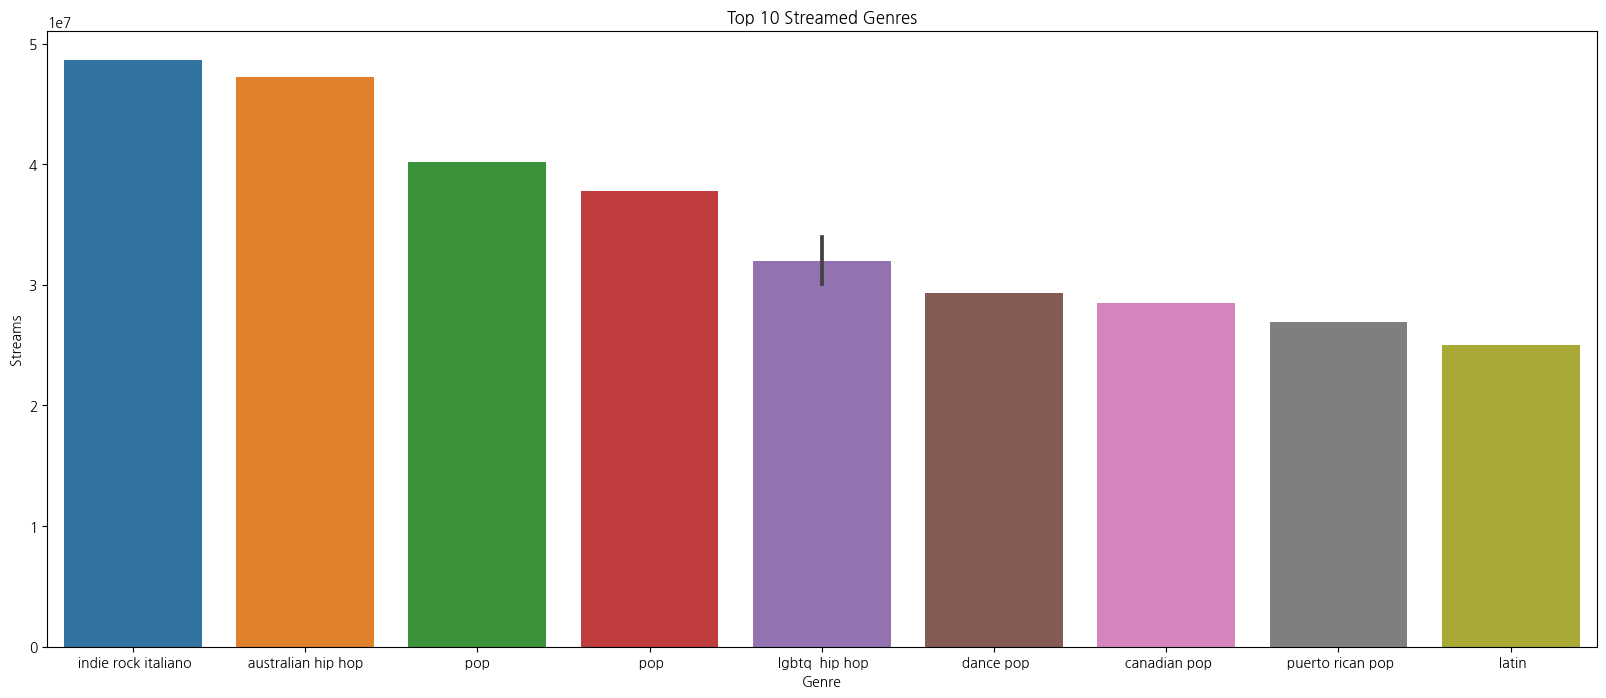

In [10]:
#Sorting by Streams
sort_streams=data.sort_values(by=['Streams'],ascending=False)
#Plotting Barchart about top 10 Genres and their total Streams
plt.figure(figsize=(20,8))
plt.title("Top 10 Streamed Genres")
sns.barplot(x='Genre',y='Streams',data=sort_streams.head(10))

<AxesSubplot:title={'center':'Top 10 Most Streamed Artists'}, xlabel='Artist', ylabel='Streams'>

c:\Users\zzzzz\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 229 (\N{LATIN SMALL LETTER A WITH RING ABOVE}) missing from current font.
  func(*args, **kwargs)
c:\Users\zzzzz\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 229 (\N{LATIN SMALL LETTER A WITH RING ABOVE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


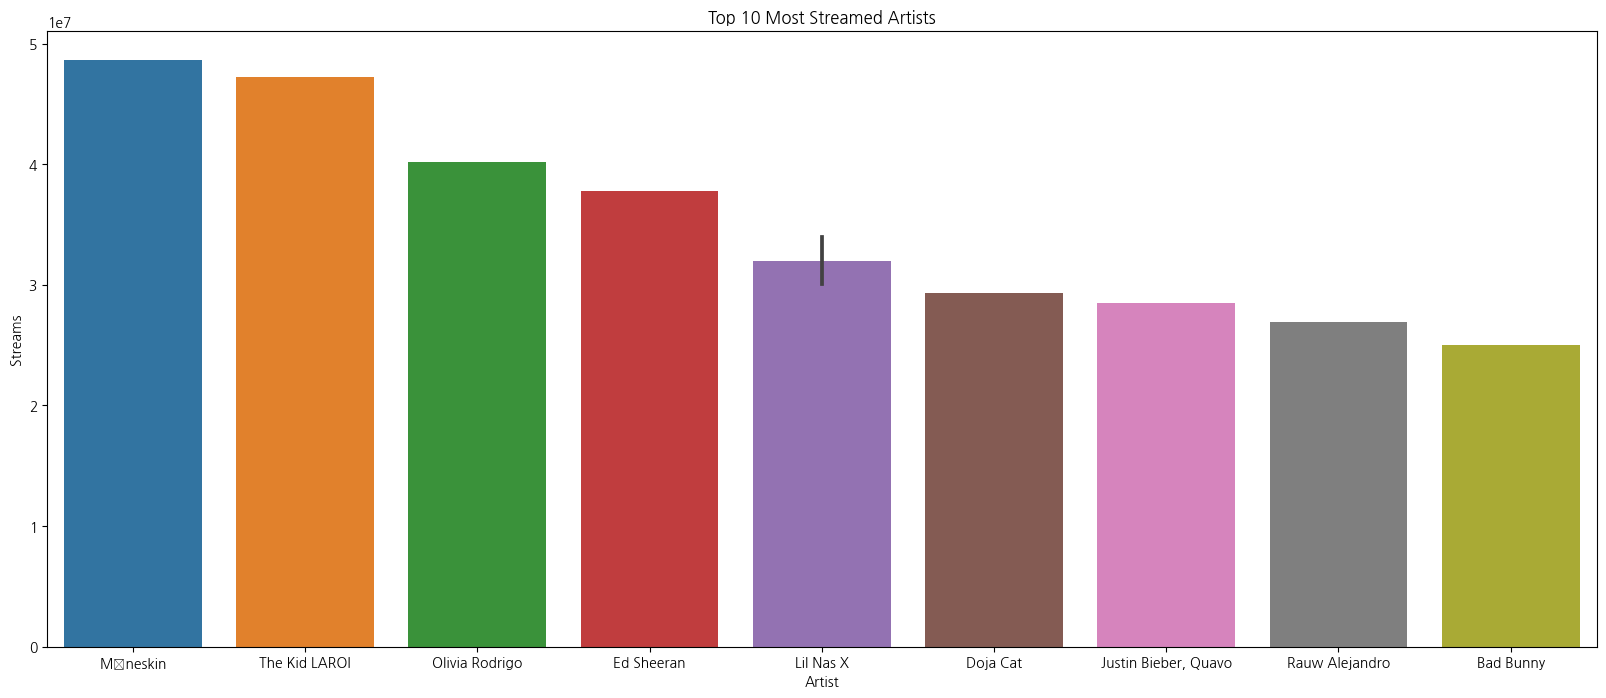

In [11]:
#Plotting Barchart about artist and their total streams
plt.figure(figsize=(20,8))
plt.title("Top 10 Most Streamed Artists")
sns.barplot(x='Artist',y='Streams',data=sort_streams.head(10))

<AxesSubplot:title={'center':'Top 10 Highest Charted Songs'}, xlabel='Number of Times Charted', ylabel='Song Name'>

c:\Users\zzzzz\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 193 (\N{LATIN CAPITAL LETTER A WITH ACUTE}) missing from current font.
  func(*args, **kwargs)
c:\Users\zzzzz\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 193 (\N{LATIN CAPITAL LETTER A WITH ACUTE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


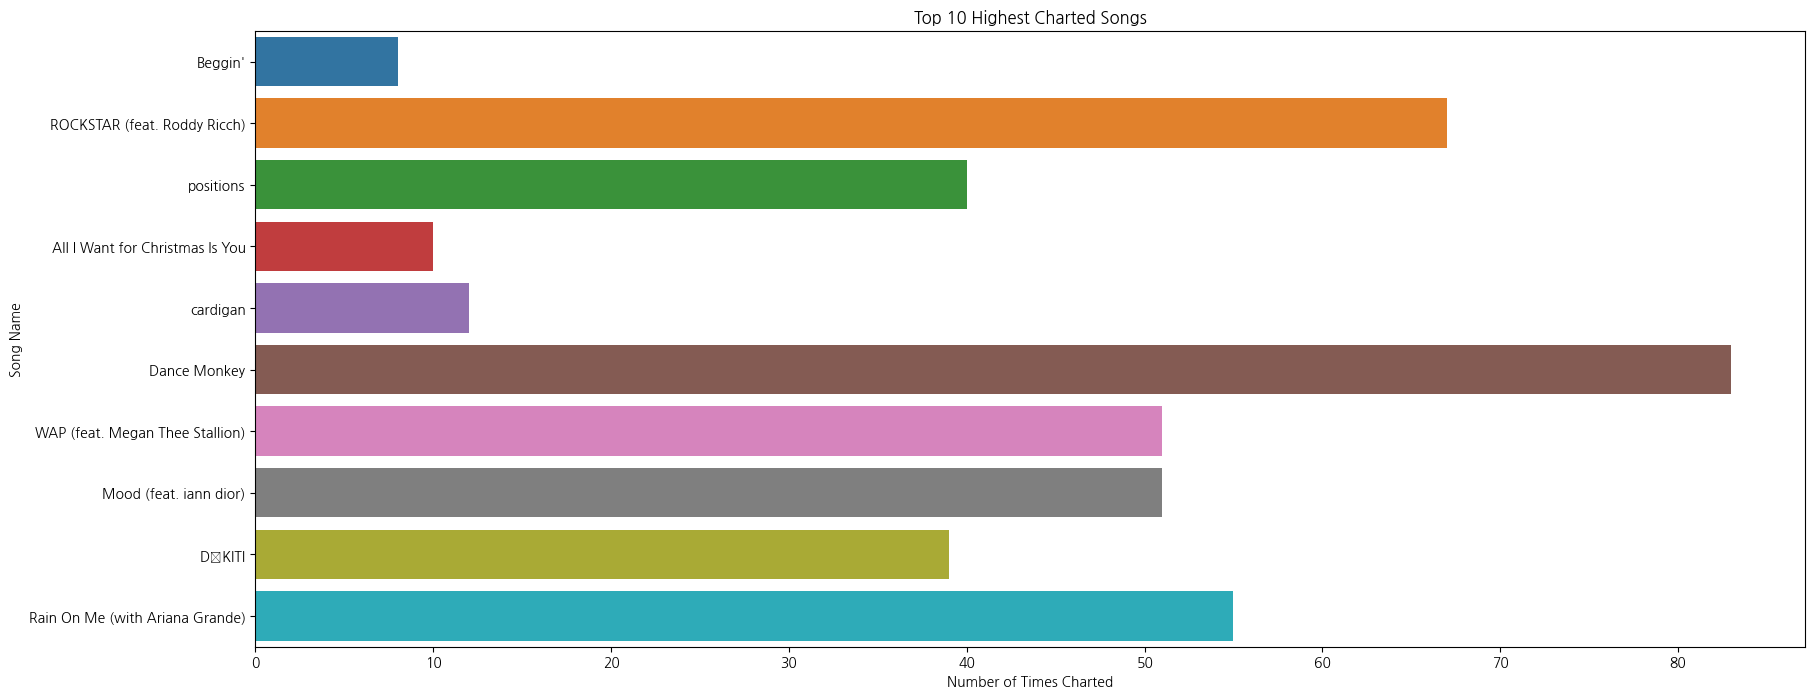

In [12]:
#Sorting the dataset by Highest Charting Position
sort_chart=data.sort_values(by=['Highest Charting Position'],ascending=True)
sort_chart
#Plotting Barchart about artist and their followers
plt.figure(figsize=(20,8))
plt.title("Top 10 Highest Charted Songs")
sns.barplot(x='Number of Times Charted',y='Song Name',data=sort_chart.head(10))

<AxesSubplot:title={'center':'Popularity based on Loudness'}, xlabel='Popularity', ylabel='Loudness'>

c:\Users\zzzzz\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
c:\Users\zzzzz\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


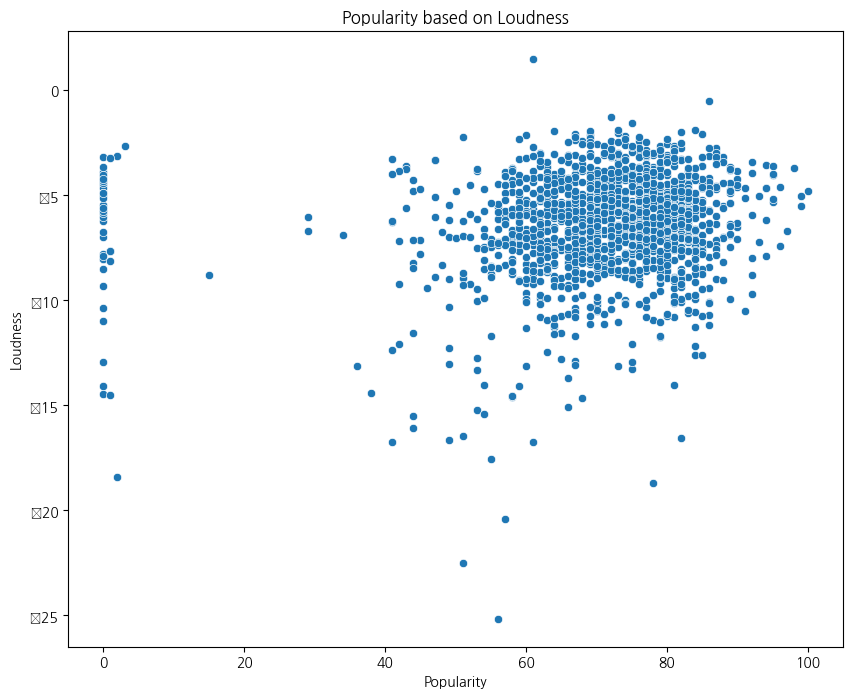

In [13]:
#Scatterplot of Popularity of Genres based on Loudness
plt.figure(figsize=(10,8))
plt.title("Popularity based on Loudness")
sns.scatterplot(x='Popularity',y='Loudness',data=data)

c:\Users\zzzzz\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<AxesSubplot:>

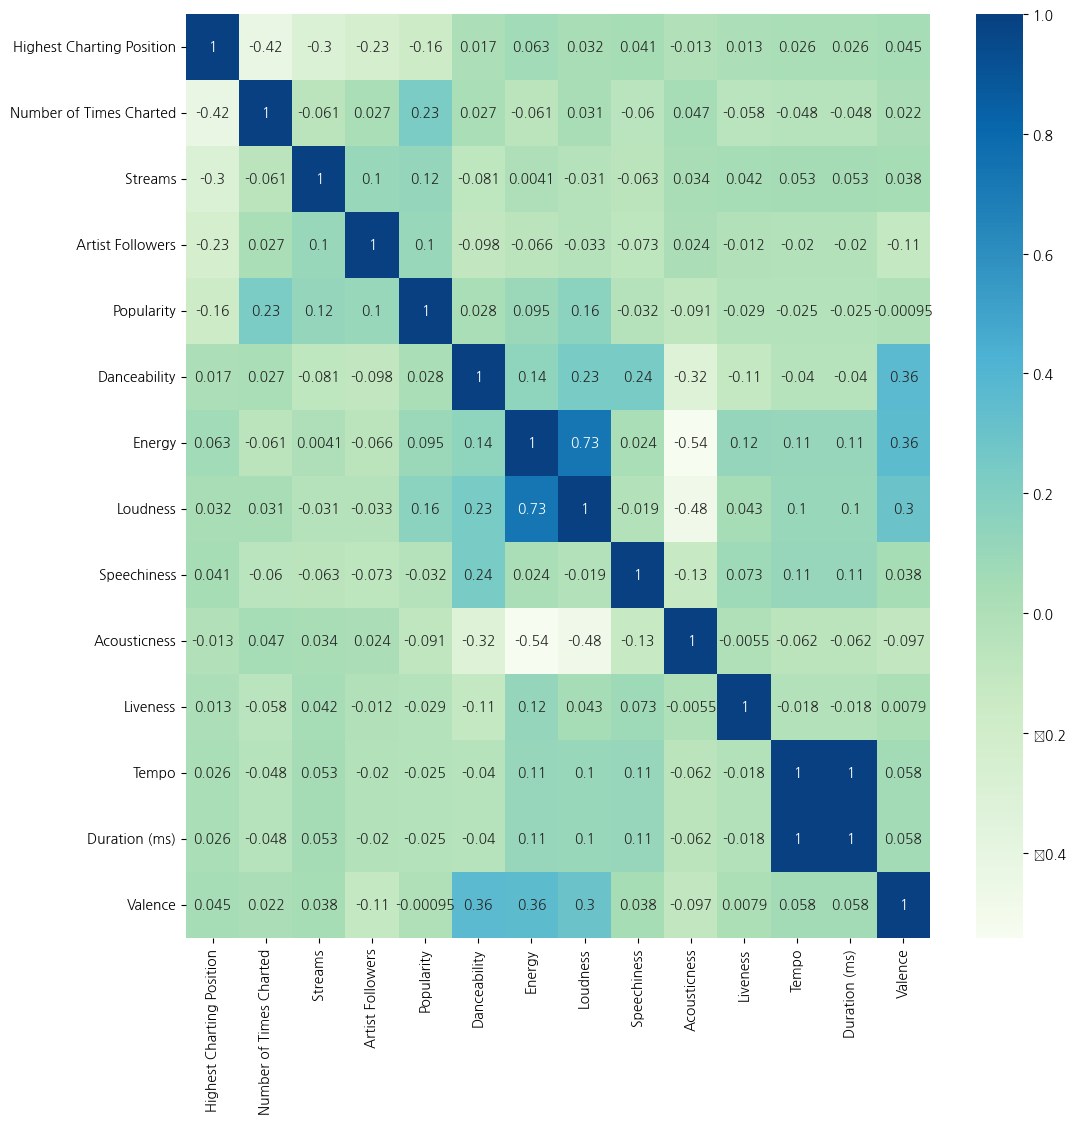

In [14]:
#Calculating Correlation
corr=data.corr()

#Plotting Correlation
plt.figure(figsize=(12,12))
sns.heatmap(corr,annot=True,cmap="GnBu")

In [15]:
data.columns

Index(['Highest Charting Position', 'Number of Times Charted',
       'Week of Highest Charting', 'Song Name', 'Streams', 'Artist',
       'Artist Followers', 'Song ID', 'Genre', 'Release Date', 'Weeks Charted',
       'Popularity', 'Danceability', 'Energy', 'Loudness', 'Speechiness',
       'Acousticness', 'Liveness', 'Tempo', 'Duration (ms)', 'Valence',
       'Chord'],
      dtype='object')

In [16]:
data = data.drop(columns=['Song ID', 'Chord', 'Artist', 'Song Name', 'Release Date', 'Week of Highest Charting', 'Weeks Charted'])

In [17]:
data

,Highest Charting Position,Number of Times Charted,Streams,Artist Followers,Genre,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence
0,1,8,48633449,3377762.0,indie rock italiano,100.0,0.714,0.800,-4.808,0.0504,0.12700,0.3590,134.002,134.002,0.589
1,2,3,47248719,2230022.0,australian hip hop,99.0,0.591,0.764,-5.484,0.0483,0.03830,0.1030,169.928,169.928,0.478
2,1,11,40162559,6266514.0,pop,99.0,0.563,0.664,-5.044,0.1540,0.33500,0.0849,166.928,166.928,0.688
3,3,5,37799456,83293380.0,pop,98.0,0.808,0.897,-3.712,0.0348,0.04690,0.3640,126.026,126.026,0.591
4,5,1,33948454,5473565.0,lgbtq hip hop,96.0,0.736,0.704,-7.409,0.0615,0.02030,0.0501,149.995,149.995,0.894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551,195,1,4630675,27167675.0,dance pop,79.0,0.762,0.700,-6.021,0.0694,0.00261,0.1530,116.073,116.073,0.608
1552,196,1,4623030,15019109.0,sertanejo,66.0,0.528,0.870,-3.123,0.0851,0.24000,0.3330,152.370,152.370,0.714
1553,197,1,4620876,22698747.0,dance pop,81.0,0.765,0.523,-4.333,0.0300,0.18400,0.1320,104.988,104.988,0.394
1554,198,1,4607385,208630.0,brega funk,60.0,0.832,0.550,-7.026,0.0587,0.24900,0.1820,154.064,154.064,0.881


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1545 entries, 0 to 1555
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Highest Charting Position  1545 non-null   int64  
 1   Number of Times Charted    1545 non-null   int64  
 2   Streams                    1545 non-null   int64  
 3   Artist Followers           1545 non-null   float64
 4   Genre                      1545 non-null   object 
 5   Weeks Charted              1545 non-null   object 
 6   Popularity                 1545 non-null   float64
 7   Danceability               1545 non-null   float64
 8   Energy                     1545 non-null   float64
 9   Loudness                   1545 non-null   float64
 10  Speechiness                1545 non-null   float64
 11  Acousticness               1545 non-null   float64
 12  Liveness                   1545 non-null   float64
 13  Tempo                      1545 non-null   float

In [18]:
#Encoding Genre
genre_encoder = LabelEncoder()
data['Genre'] = genre_encoder.fit_transform(data['Genre'])
data.head()

,Highest Charting Position,Number of Times Charted,Streams,Artist Followers,Genre,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence
0,1,8,48633449,3377762.0,118,100.0,0.714,0.800,-4.808,0.0504,0.1270,0.3590,134.002,134.002,0.589
1,2,3,47248719,2230022.0,17,99.0,0.591,0.764,-5.484,0.0483,0.0383,0.1030,169.928,169.928,0.478
2,1,11,40162559,6266514.0,163,99.0,0.563,0.664,-5.044,0.1540,0.3350,0.0849,166.928,166.928,0.688
3,3,5,37799456,83293380.0,162,98.0,0.808,0.897,-3.712,0.0348,0.0469,0.3640,126.026,126.026,0.591
4,5,1,33948454,5473565.0,134,96.0,0.736,0.704,-7.409,0.0615,0.0203,0.0501,149.995,149.995,0.894


In [32]:
#pd.set_option('display.max.colwidth', None)

In [20]:
training_data, testing_data = train_test_split(data, test_size=0.2, random_state=25)

print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

testing_data

No. of training examples: 1236
No. of testing examples: 309


,Highest Charting Position,Number of Times Charted,Streams,Artist Followers,Genre,Popularity,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence
1492,73,1,9260007,46814751.0,67,62.0,0.871,0.493,-6.356,0.2050,0.0134,0.3850,144.989,144.989,0.0495
1238,156,13,4411998,554042.0,10,77.0,0.815,0.518,-6.594,0.0897,0.2230,0.1040,151.891,151.891,0.8770
1015,169,1,4803071,942380.0,103,60.0,0.874,0.542,-7.064,0.3440,0.0621,0.1810,142.016,142.016,0.4810
667,22,2,8115520,42227614.0,162,66.0,0.575,0.434,-8.193,0.0312,0.7350,0.1050,145.916,145.916,0.3480
1432,66,7,6554824,82522.0,51,70.0,0.866,0.438,-8.943,0.0719,0.1770,0.0743,129.039,129.039,0.6950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,15,3,7880155,14097410.0,57,76.0,0.770,0.574,-5.525,0.1060,0.0617,0.1040,98.962,98.962,0.1040
736,16,2,8413330,37151476.0,126,76.0,0.764,0.526,-7.355,0.2120,0.0484,0.0718,114.910,114.910,0.5880
867,116,1,6292620,4849204.0,49,71.0,0.616,0.617,-8.431,0.5200,0.1280,0.1770,175.929,175.929,0.4760
1094,145,5,4473413,207170.0,8,79.0,0.648,0.308,-11.729,0.0400,0.8860,0.1240,76.997,76.997,0.1980


In [23]:
#Dropping Stream Column From Test data
testing_data_stream=testing_data['Popularity']
testing_data=testing_data.drop('Popularity', axis=1)
testing_data.head()

,Highest Charting Position,Number of Times Charted,Streams,Artist Followers,Genre,Danceability,Energy,Loudness,Speechiness,Acousticness,Liveness,Tempo,Duration (ms),Valence
1492,73,1,9260007,46814751.0,67,0.871,0.493,-6.356,0.2050,0.0134,0.3850,144.989,144.989,0.0495
1238,156,13,4411998,554042.0,10,0.815,0.518,-6.594,0.0897,0.2230,0.1040,151.891,151.891,0.8770
1015,169,1,4803071,942380.0,103,0.874,0.542,-7.064,0.3440,0.0621,0.1810,142.016,142.016,0.4810
667,22,2,8115520,42227614.0,162,0.575,0.434,-8.193,0.0312,0.7350,0.1050,145.916,145.916,0.3480
1432,66,7,6554824,82522.0,51,0.866,0.438,-8.943,0.0719,0.1770,0.0743,129.039,129.039,0.6950


In [21]:
#Setting training data into x_train and y_train
x_train=training_data.drop('Popularity',axis=1)
y_train=training_data['Popularity']

#Shapes of x_train,y_train and test data
x_train.shape, y_train.shape, testing_data.shape

((1236, 14), (1236,), (309, 15))

In [24]:
#Linear Regression Modelling and Training
linear_model=LinearRegression()
linear_model.fit(x_train,y_train)
print(linear_model.score(x_train,y_train))

#testing the model and Displaying the output
linear_predict=linear_model.predict(testing_data)
l_output=pd.DataFrame({'Id':testing_data.index,'Predicted Streams':linear_predict,'Actual Stream':testing_data_stream})
print(l_output)

0.18331476732593388
        Id  Predicted Streams  Actual Stream
1492  1492          69.686999           62.0
1238  1238          61.386865           77.0
1015  1015          66.700823           60.0
667    667          73.441415           66.0
1432  1432          63.606243           70.0
...    ...                ...            ...
338    338          70.617768           76.0
736    736          73.582383           76.0
867    867          62.445011           71.0
1094  1094          57.329158           79.0
238    238          68.296397           80.0

[309 rows x 3 columns]


In [27]:
#Random Forest Regression
r_model=RandomForestRegressor(n_estimators=50)
r_model.fit(x_train,y_train)
print(r_model.score(x_train,y_train))

#Making predictions on test set 
r_predict=r_model.predict(testing_data)

r_output=pd.DataFrame({'Id':testing_data.index,'Predicted Streams':r_predict,'Actual Stream':testing_data_stream})
print(r_output)

0.9564340888335808
        Id  Predicted Streams  Actual Stream
1492  1492              62.98           62.0
1238  1238              74.82           77.0
1015  1015              62.06           60.0
667    667              68.96           66.0
1432  1432              72.84           70.0
...    ...                ...            ...
338    338              79.26           76.0
736    736              66.98           76.0
867    867              67.94           71.0
1094  1094              67.22           79.0
238    238              72.10           80.0

[309 rows x 3 columns]


In [28]:
#Building the model in Ridge Regression Model
ridge_model=Ridge(alpha=1.0)
ridge_model.fit(x_train,y_train)
print(ridge_model.score(x_train,y_train))

#Testing the model
ridge_predict=ridge_model.predict(testing_data)

#Creating dataframe to store ID with prediction
ridge_output=pd.DataFrame({'Id':testing_data.index,'Predicted Streams':ridge_predict,'Actual Stream':testing_data_stream})
print(ridge_output)

0.18330895623754084
        Id  Predicted Streams  Actual Stream
1492  1492          69.737660           62.0
1238  1238          61.396774           77.0
1015  1015          66.686404           60.0
667    667          73.449658           66.0
1432  1432          63.617450           70.0
...    ...                ...            ...
338    338          70.600685           76.0
736    736          73.546846           76.0
867    867          62.374170           71.0
1094  1094          57.355917           79.0
238    238          68.283089           80.0

[309 rows x 3 columns]


c:\Users\zzzzz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=1.45142e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


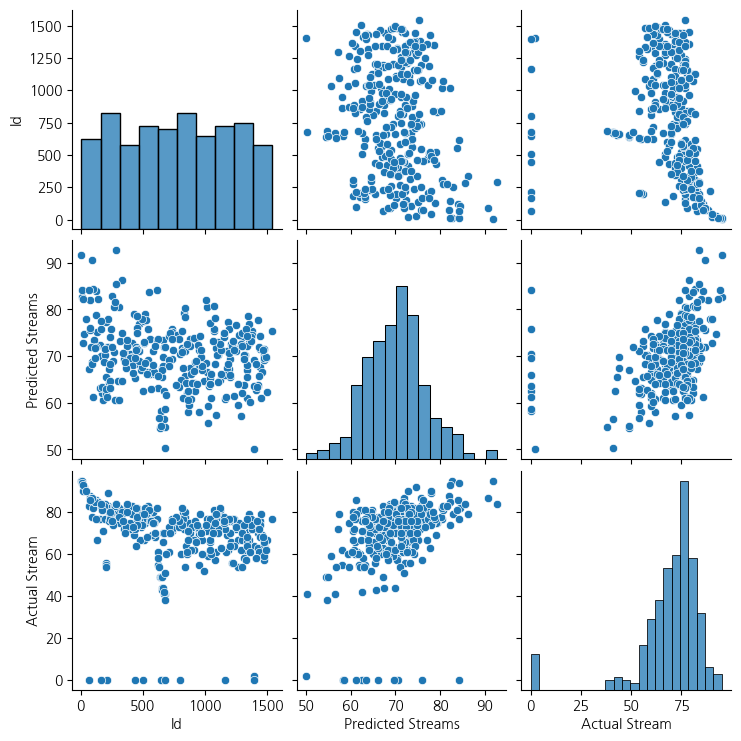

In [25]:
sns.pairplot(l_output)

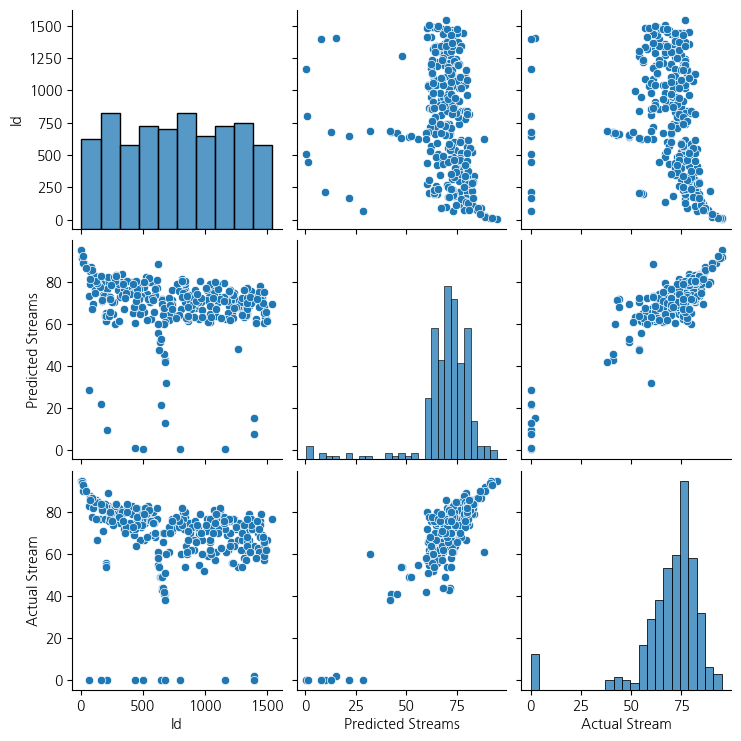

In [29]:
sns.pairplot(r_output)


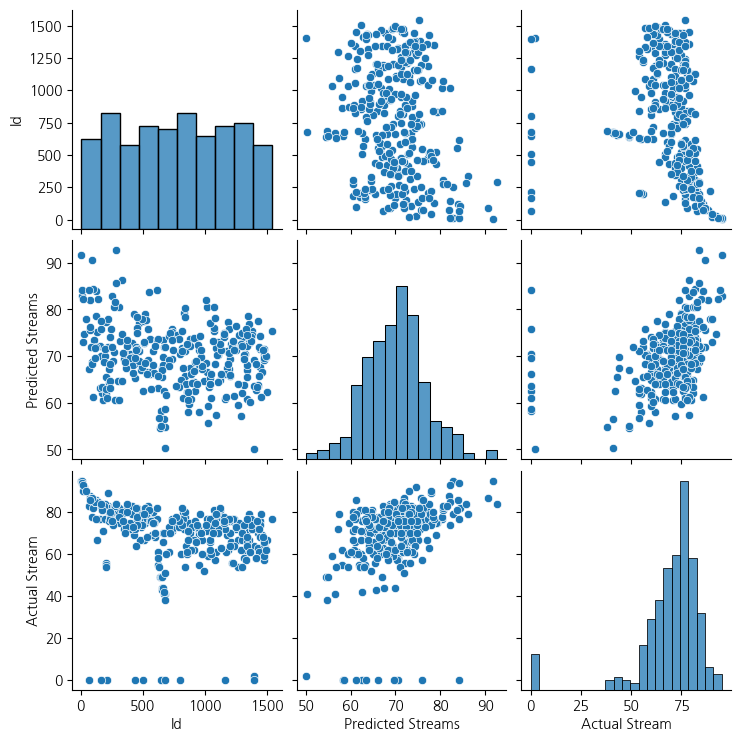

In [30]:
sns.pairplot(ridge_output)

In [31]:
sns.pairplot(lasso_output)

NameError: name 'lasso_output' is not defined

In [32]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = x_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()
Model: "sequential"

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1920      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 1)                 257       
                                                                 
Total params: 166,785
Trainable params: 166,785
Non-trainable params: 0
_________________________________________________________________


In [33]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [34]:
NN_model.fit(x_train, y_train, epochs=500, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

Epoch 1/500
26/31 [========================>.....] - ETA: 0s - loss: 37201.5820 - mean_absolute_error: 37201.5820
Epoch 1: val_loss improved from inf to 2244.47412, saving model to Weights-001--2244.47412.hdf5
31/31 [==============================] - 3s 19ms/step - loss: 31694.5703 - mean_absolute_error: 31694.5703 - val_loss: 2244.4741 - val_mean_absolute_error: 2244.4741
Epoch 2/500
22/31 [====================>.........] - ETA: 0s - loss: 1571.6515 - mean_absolute_error: 1571.6515
Epoch 2: val_loss improved from 2244.47412 to 1640.98584, saving model to Weights-002--1640.98584.hdf5
31/31 [==============================] - 0s 5ms/step - loss: 1354.6906 - mean_absolute_error: 1354.6906 - val_loss: 1640.9858 - val_mean_absolute_error: 1640.9858
Epoch 3/500
16/31 [==============>...............] - ETA: 0s - loss: 964.9639 - mean_absolute_error: 964.9639  
Epoch 3: val_loss improved from 1640.98584 to 275.48224, saving model to Weights-003--275.48224.hdf5
31/31 [==========================